## ML - Classification of disease using K-NN

The given dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with Parkinson's Disease, according to "status" column which is set to **0 for healthy** and **1 for PD**.  


Dataset can be downloaded from below link: (Data is available in .data extension)

https://archive.ics.uci.edu/ml/datasets/parkinsons




Create classification model using KNN. Identify the optimum no of neighbors and dimensions for your model.
Justify if KNN model should be considered or not for the problem statement.

Evaluate based on:
1) Handling of missing values, outliers, if any .

2) Identifying data and model issues if any.

3) Choice of packages and distance measure used. justify your answer.

4) Selection of train, test split.

5) Final model creation and accuracy matrix selected for the model.

6) Future scope of the work.  



#### Importing all the necessary libraries

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn.metrics import confusion_matrix
from pathlib import Path
import os
import seaborn as sns

In [ ]:
working_dir = Path(os.getcwd())
print(working_dir)

## PRE-PROCESSING

#### Importing the dataset

In [179]:
df = pd.read_csv(working_dir.joinpath('parkinsons.data'))

In [ ]:
df.head()

#### Finding the count of unique names in the given dataset

In [121]:
df["name"].nunique()

195

#### Since each particular patient have 6 individual rows of different voice modulations, we are trying to add the PatientID for each of these rows to check the number of individuals

In [122]:
df['PatientID'] = df['name'].apply(lambda name:str(name[9:12]))

In [ ]:
df.head()

#### Creating a list of the unique Patients after combining and filtering

In [ ]:
df['PatientID'].unique()

In [ ]:
df.columns.tolist()

#### Each Patient have 6 observations, we are combining all the features of the 6 rows by their mean and grouping it by their respective patients to get 1 single observation for each patient

In [126]:
df_new = df.groupby(['PatientID']).mean()

In [ ]:
df_new.columns.tolist()

#### Splitting the Dependent and the Independent features

In [128]:
X = df_new.drop(['status'], axis = 1)
y = df_new['status']

In [ ]:
X

#### Plotting to see the Status of the Patients who have Parkinson's and who have not

In [ ]:
sns.countplot(x='status',data=df_new)

## MODEL BUILDING

### Splitting the dataset into the training set and test set

In [135]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [136]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler()
# scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

### Importing the KNN claissifier

In [137]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

### As the number of observations are only 31, so we are taking n from a range of 1 to 10 to check the error rates for each n

In [ ]:
error_rate = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test.values))
    
print(error_rate)

Minimum error:- 0.14285714285714285 at K = 4


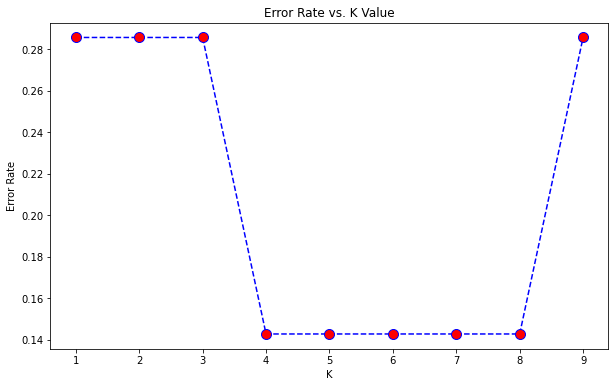

In [139]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10), error_rate, color='blue', linestyle='dashed', 
         marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print(f"Minimum error:- {min(error_rate)} at K = {error_rate.index(min(error_rate))+1}")

#### We can see that the error rate is minimal at K == 4. 

[0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.7142857142857143]


Text(0, 0.5, 'Accuracy')

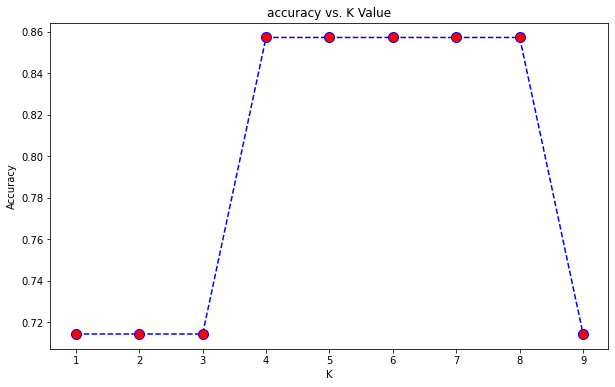

In [142]:
acc = []
for i in range(1,10):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
print(acc)
plt.figure(figsize=(10,6))
plt.plot(range(1,10), acc, color='blue', linestyle='dashed', 
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

#### Accuracy is highest at K == 4, accuracy matrix is shown above the plot.

### From above analysis, we choose *K = 4* and build our final model

In [147]:
final_model = KNeighborsClassifier(n_neighbors = 4).fit(X_train, y_train)

### Importing a random dataset to check whether our KNN classifier has correctly predicted or not.

In [ ]:
import random

# POSITIVE EXAMPLE
random.seed(10)
random_ind = random.randint(0,len(df_new))

new_customer = df_new.drop('status',axis=1).iloc[random_ind]
new_customer

#### Actual Status

In [149]:
df_new.iloc[random_ind]['status']

1.0

#### Predicted Status

In [151]:
final_model.predict(scaler.transform(new_customer.values.reshape(1,22))).tolist()[0]

1

In [ ]:
# NEGATIVE EXAMPLE

random.seed(6)
random_ind = random.randint(0,len(df_new))

new_customer = df_new.drop('status',axis=1).iloc[random_ind]
new_customer

#### Actual Status

In [177]:
df_new.iloc[random_ind]['status']

0.0

#### Predicted Status

In [178]:
final_model.predict(scaler.transform(new_customer.values.reshape(1,22))).tolist()[0]

0

### We see that our KNN Classifier has correctly classified the Patient who has Parkinson's disease. Although the number of patients is low, our classifeir was able to predict correctly which shows that it can be implemented to diagnose patients based on their voice recordings of whether they have Parkinson's disease or not.

### Furthermore, we can introduce cross-validation techniques to avoid over-fitting and make sure that the adequate K value is achieved.